# Introduction
Notebook contains EDA of [Soccer detailed players match data](https://www.kaggle.com/datasets/spicemix/soccer-detailed-players-match-data?resource=download) dataset and is first milestone of clustering project for Introduction to Machine Learning university course

## Initial data description



* details of the match statistics for each player 
* two tables with the same structure - both home and away teams
* each row represents one player for the given match
* 127 columns


## Data import

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import warnings

warnings.filterwarnings('ignore')

In [7]:
home_df = pd.read_csv("..\data\players_home_matches.csv")
away_df = pd.read_csv("..\data\players_away_matches.csv")

## EDA
I will focus on the home matches as both tables have the same structure

In [8]:
home_df.head()

,Unnamed: 0,awayScore,awayTeamName,awayTeamTacticalSchema,homeScore,homeTeamName,homeTeamTacticalSchema,matchDate,matchWeek,playerName,...,touches_att_3rd,touches_att_pen_area,touches_def_3rd,touches_def_pen_area,touches_live_ball,touches_mid_3rd,xa,xg,team_name,championship_name
0,0,0,Alavés,(4-1-4-1),2,Athletic Club,(4-2-3-1),2019-09-22,5,Raúl García,...,28.0,6.0,2.0,0.0,50.0,23.0,0.1,0.9,Athletic Club,liga
1,1,0,Atlético Madrid,(4-4-2),2,Athletic Club,(4-2-3-1),2019-03-16,28,Mikel San José,...,9.0,3.0,10.0,1.0,49.0,31.0,0.1,0.0,Athletic Club,liga
2,2,0,Real Betis,(3-1-4-2),1,Athletic Club,(4-2-3-1),2019-01-27,21,Óscar de Marcos,...,24.0,6.0,3.0,1.0,32.0,7.0,0.4,0.1,Athletic Club,liga
3,3,1,Real Sociedad,(4-2-3-1),0,Athletic Club,(4-2-3-1),2020-12-31,16,Unai López,...,3.0,1.0,3.0,1.0,11.0,8.0,0.0,0.1,Athletic Club,liga
4,4,2,Rayo Vallecano,(4-2-3-1),3,Athletic Club,(4-2-3-1),2019-04-14,32,Iñigo Córdoba,...,20.0,3.0,8.0,1.0,43.0,19.0,0.3,0.0,Athletic Club,liga


In [9]:
away_df.head()

,Unnamed: 0,awayScore,awayTeamName,awayTeamTacticalSchema,homeScore,homeTeamName,homeTeamTacticalSchema,matchDate,matchWeek,playerName,...,touches_att_3rd,touches_att_pen_area,touches_def_3rd,touches_def_pen_area,touches_live_ball,touches_mid_3rd,xa,xg,team_name,championship_name
0,0,0,Reims,(3-4-1-2),0,Nice,(4-4-2),2021-08-08,1,Andrew Gravillon,...,3.0,1.0,37.0,8.0,57.0,27.0,0.0,0.0,Nice,ligue 1
1,1,0,Reims,(3-4-1-2),0,Nice,(4-4-2),2021-08-08,1,Ghislain Konan,...,19.0,0.0,21.0,2.0,47.0,28.0,0.0,0.0,Nice,ligue 1
2,2,0,Reims,(3-4-1-2),0,Nice,(4-4-2),2021-08-08,1,Kaj Sierhuis,...,8.0,2.0,4.0,1.0,19.0,7.0,0.1,0.0,Nice,ligue 1
3,3,0,Reims,(3-4-1-2),0,Nice,(4-4-2),2021-08-08,1,Marshall Munetsi,...,2.0,0.0,8.0,3.0,28.0,18.0,0.0,0.0,Nice,ligue 1
4,4,0,Reims,(3-4-1-2),0,Nice,(4-4-2),2021-08-08,1,Mathieu Cafaro,...,7.0,1.0,9.0,1.0,22.0,11.0,0.0,0.0,Nice,ligue 1


In [10]:
home_df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76215 entries, 0 to 76214
Data columns (total 127 columns):
 #    Column                       Non-Null Count  Dtype  
---   ------                       --------------  -----  
 0    Unnamed: 0                   76215 non-null  int64  
 1    awayScore                    76215 non-null  int64  
 2    awayTeamName                 76215 non-null  object 
 3    awayTeamTacticalSchema       76215 non-null  object 
 4    homeScore                    76215 non-null  int64  
 5    homeTeamName                 76215 non-null  object 
 6    homeTeamTacticalSchema       76215 non-null  object 
 7    matchDate                    76215 non-null  object 
 8    matchWeek                    76215 non-null  int64  
 9    playerName                   76215 non-null  object 
 10   aerials_lost                 76142 non-null  float64
 11   aerials_won                  76142 non-null  float64
 12   aerials_won_pct              53345 non-null  float64
 13  

In [11]:
columns = home_df.columns[home_df.isnull().mean() > 0.3]
columns

Index(['aerials_won_pct', 'dribble_tackles_pct', 'dribbles_completed_pct'], dtype='object')

In [12]:
null_threshold = 0.5
rows_with_nulls  = home_df[home_df.isnull().sum(axis=1) >= null_threshold*len(home_df.columns)]
rows_with_nulls

,Unnamed: 0,awayScore,awayTeamName,awayTeamTacticalSchema,homeScore,homeTeamName,homeTeamTacticalSchema,matchDate,matchWeek,playerName,...,touches_att_3rd,touches_att_pen_area,touches_def_3rd,touches_def_pen_area,touches_live_ball,touches_mid_3rd,xa,xg,team_name,championship_name
88,88,1,Osasuna,(3-5-2),0,Athletic Club,(3-5-2),2020-02-16,24,Mikel San José,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Athletic Club,liga
856,856,0,Nantes,(3-5-2),1,Rennes,(4-4-2),2021-04-11,32,Romain Salin,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Rennes,ligue 1
930,930,2,Nantes,(4-2-3-1),3,Rennes,(4-4-2),2020-01-31,22,Sacha Boey,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Rennes,ligue 1
4632,4632,4,Sassuolo,(4-2-3-1),1,Spezia,(4-3-3),2020-09-27,2,Salvador Ferrer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spezia,seria a
4637,4637,2,Lazio,(3-5-1-1),1,Spezia,(4-3-3),2020-12-05,10,Salvador Ferrer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spezia,seria a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72928,72928,6,Roma,(3-4-3),1,SPAL,(4-1-4-1),2020-07-22,35,Kevin Bonifazi,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SPAL,NaN
73395,73395,0,Granada,(4-3-3),4,Rayo Vallecano,(4-2-3-1),2021-08-29,3,Randy Ntekja,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Rayo Vallecano,liga
73412,73412,0,Getafe,(4-4-2),3,Rayo Vallecano,(4-2-3-1),2021-09-18,5,Randy Ntekja,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Rayo Vallecano,liga
73431,73431,1,Cádiz,(4-1-4-1),3,Rayo Vallecano,(4-2-3-1),2021-09-26,7,Randy Ntekja,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Rayo Vallecano,liga


In [13]:
important_cols = [
    ('attack', ['goals', 'assists', 'shots_total', 'shots_on_target', 'carries', 'pens_att']),
    ('defense', ['interceptions', 'ball_recoveries', 'blocks', 'clearances', 'tackles']),
    ('passing', ['passes', 'passes_pct', 'passes_completed', 'passes_received', 'crosses', 'passes_into_penalty_area']),
    ('dribbling', ['dribbles']),
    ('physical', ['fouls', 'fouled']),
    ('other', ['age', 'minutes'])
]


important_cols = ['goals', 'assists', 'shots_total', 'shots_on_target', 'carries', 'pens_att', 'interceptions', 'ball_recoveries', 'blocks', 'clearances',  'tackles', 'passes', 'passes_pct', 'passes_completed', 'passes_received', 'crosses', 'passes_into_penalty_area'
, 'dribbles', 'fouls', 'fouled', 'age', 'minutes']



important_cols_v2 = [
    'goals',
    'assists',
    'shots_total',
    'shots_on_target',
    'xg',
    'xa',
    'gca',
    'carries',
    'dispossessed',
    'dribbled_past',
    'own_goals',
    'pens_made',
    'pens_won',
    'pens_att',
    'players_dribbled_past',
    'through_balls',
    'corner_kicks',
    'throw_ins',
    'interceptions',
    'tackles',
    'pressures',
    'ball_recoveries',
    'blocks',
    'blocked_shots',
    'clearances',
    'passes',
    'passes_progressive_distance',
    'passes_into_final_third',
    'passes_offsides',
    'passes_switches',
    'dribbles',
    'fouled',
    'fouls',
    'offsides',
    'minutes'
]



Understanding penalties statistics: pens_made, pens_won, pens_att

In [14]:
home_df[home_df['playerName'] == 'Lionel Messi'][["pens_made", "pens_won", "team_name", 'xg', "xa", "dispossessed", "homeTeamName", "awayTeamName", "xa", "gca"]] 

,pens_made,pens_won,team_name,xg,xa,dispossessed,homeTeamName,awayTeamName,xa,gca
17300,0,NaN,Paris Saint-Germain,0.4,0.1,2.0,Paris Saint-Germain,Lyon,0.1,0.0
17346,0,0.0,Paris Saint-Germain,0.1,0.1,2.0,Paris Saint-Germain,Lille,0.1,0.0
17364,0,0.0,Paris Saint-Germain,0.9,0.3,4.0,Paris Saint-Germain,Nantes,0.3,0.0
17377,0,0.0,Paris Saint-Germain,0.3,0.6,4.0,Paris Saint-Germain,Nice,0.6,0.0
17392,0,0.0,Paris Saint-Germain,0.5,0.2,8.0,Paris Saint-Germain,Monaco,0.2,2.0
23664,1,0.0,Barcelona,2.2,1.3,3.0,Barcelona,Valladolid,1.3,1.0
23684,0,0.0,Barcelona,0.2,0.2,1.0,Barcelona,Atlético Madrid,0.2,0.0
23695,0,0.0,Barcelona,0.2,0.3,3.0,Barcelona,Sevilla,0.3,0.0
23703,0,0.0,Barcelona,0.2,0.0,8.0,Barcelona,Alavés,0.0,1.0
23720,0,0.0,Barcelona,0.7,0.5,2.0,Barcelona,Huesca,0.5,2.0


* pens_att - attempted
* pens_made - succesfully scored
* pens_won - acquired for the team

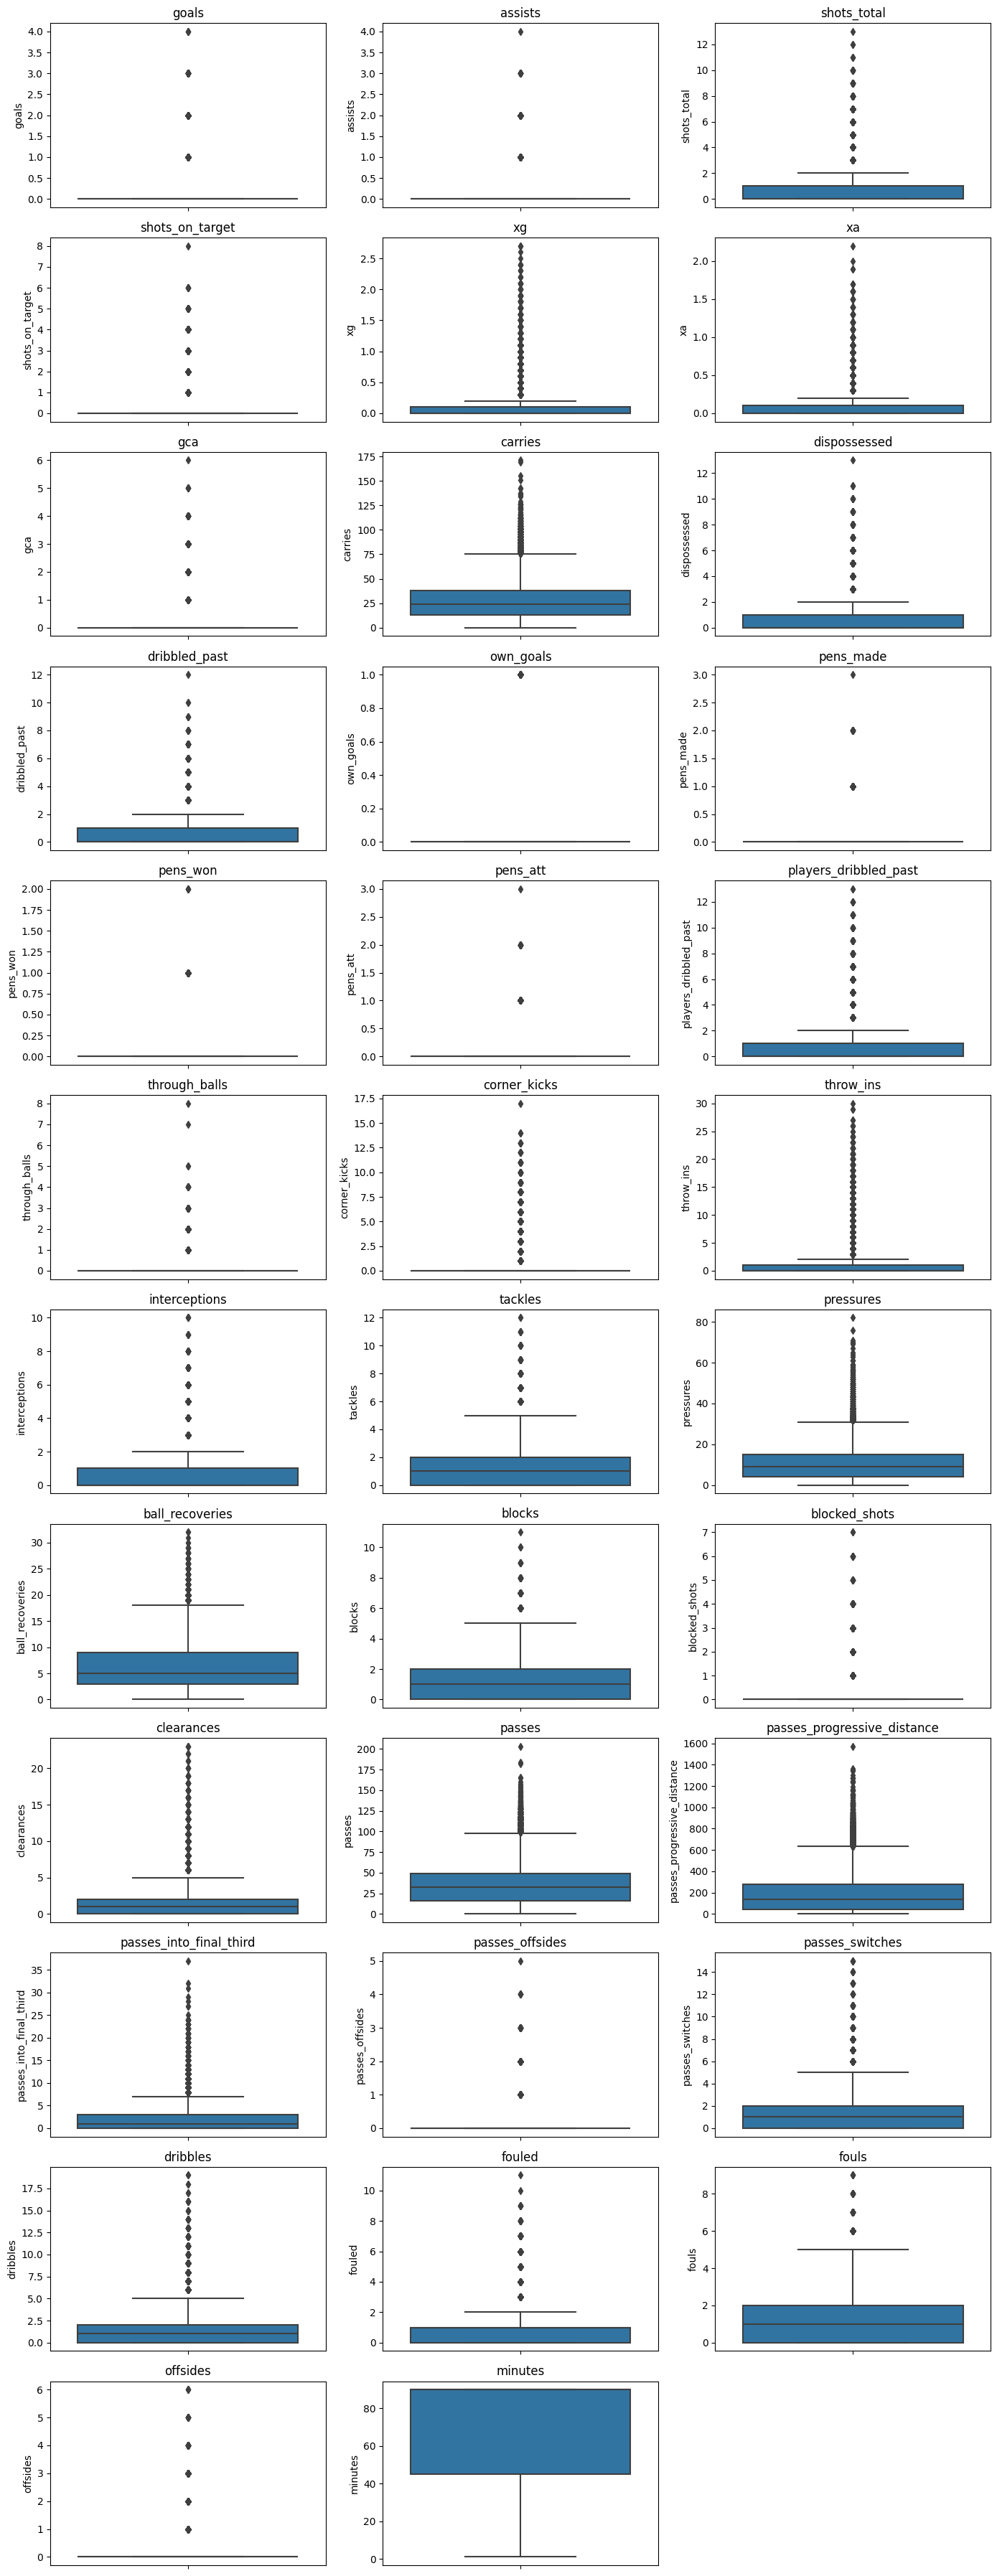

In [15]:
nr_cols = 3
nr_rows = int(np.ceil(len(important_cols_v2) / nr_cols))

# Ustawienie wielkości wykresu
plt.figure(figsize=(14, nr_rows * 3))

# Tworzenie boxplotów
for i, col in enumerate(important_cols_v2):
    plt.subplot(nr_rows, nr_cols, i+1)
    sns.boxplot(y=home_df[col])
    plt.title(col)
    plt.tight_layout()

In [16]:
sns.pairplot(home_df[important_cols_v2], plot_kws={'alpha':0.7})

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x0000017C186705E0> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

Duplicates

In [ ]:
home_df.duplicated().sum()

0

## Final view on the set, description and conclusions

* columns with significant amount of nulls: "dribbles_completed_pct" ~ 50%,  dribble_tackles_pct ~ 45%, aerials_won_pct ~ 30%
* 73 rows lack over 50% of column values
* we selected key features and visualized them
* no duplicates

## Standarizing the data

In [34]:
df = home_df[important_cols_v2]
df.head()

,goals,assists,shots_total,shots_on_target,xg,xa,gca,carries,dispossessed,dribbled_past,...,passes,passes_progressive_distance,passes_into_final_third,passes_offsides,passes_switches,dribbles,fouled,fouls,offsides,minutes
0,1,0,3,0,0.9,0.1,0.0,28.0,1.0,3.0,...,38.0,119.0,4.0,1.0,3.0,0.0,3,2,1,90.0
1,0,0,0,0,0.0,0.1,0.0,22.0,1.0,2.0,...,40.0,226.0,1.0,0.0,0.0,1.0,1,2,0,90.0
2,0,1,1,0,0.1,0.4,1.0,25.0,1.0,3.0,...,23.0,58.0,1.0,1.0,1.0,2.0,0,2,0,83.0
3,0,0,1,0,0.1,0.0,0.0,9.0,0.0,0.0,...,10.0,74.0,2.0,1.0,1.0,1.0,0,0,0,17.0
4,0,1,1,0,0.0,0.3,1.0,35.0,2.0,7.0,...,31.0,162.0,1.0,2.0,0.0,3.0,1,2,0,90.0


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76215 entries, 0 to 76214
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   goals                        76215 non-null  int64  
 1   assists                      76215 non-null  int64  
 2   shots_total                  76215 non-null  int64  
 3   shots_on_target              76215 non-null  int64  
 4   xg                           76142 non-null  float64
 5   xa                           76142 non-null  float64
 6   gca                          76142 non-null  float64
 7   carries                      76142 non-null  float64
 8   dispossessed                 76142 non-null  float64
 9   dribbled_past                76142 non-null  float64
 10  own_goals                    76215 non-null  int64  
 11  pens_made                    76215 non-null  int64  
 12  pens_won                     73217 non-null  float64
 13  pens_att        

In [36]:
df.describe()

,goals,assists,shots_total,shots_on_target,xg,xa,gca,carries,dispossessed,dribbled_past,...,passes,passes_progressive_distance,passes_into_final_third,passes_offsides,passes_switches,dribbles,fouled,fouls,offsides,minutes
count,76215.000000,76215.000000,76215.000000,76215.000000,76142.000000,76142.000000,76142.000000,76142.000000,76142.000000,76142.000000,...,76142.000000,76142.000000,76142.000000,76142.000000,76142.000000,76142.000000,76215.000000,76215.000000,76215.000000,76168.000000
mean,0.103077,0.071967,0.910634,0.304008,0.099309,0.065399,0.168330,27.353405,0.780423,0.722256,...,34.563119,182.959746,2.072509,0.114549,1.054517,1.184602,0.924503,0.958237,0.131811,67.967637
std,0.341038,0.278851,1.278673,0.635978,0.219203,0.148858,0.458886,18.977424,1.146291,1.043229,...,23.442851,169.683467,2.579638,0.353726,1.489066,1.692163,1.191019,1.145124,0.426505,30.029930
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000,...,16.000000,44.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,45.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.000000,0.000000,0.000000,...,32.000000,136.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,90.000000
75%,0.000000,0.000000,1.000000,0.000000,0.100000,0.100000,0.000000,38.000000,1.000000,1.000000,...,49.000000,280.000000,3.000000,0.000000,2.000000,2.000000,1.000000,2.000000,0.000000,90.000000
max,4.000000,4.000000,13.000000,8.000000,2.700000,2.200000,6.000000,171.000000,13.000000,12.000000,...,203.000000,1571.000000,37.000000,5.000000,15.000000,19.000000,11.000000,9.000000,6.000000,90.000000


In [37]:
null_threshold = 0.5
rows_with_nulls  = home_df[home_df.isnull().sum(axis=1) >= null_threshold*len(home_df.columns)]
df = df.drop(rows_with_nulls.index)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 76142 entries, 0 to 76214
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   goals                        76142 non-null  int64  
 1   assists                      76142 non-null  int64  
 2   shots_total                  76142 non-null  int64  
 3   shots_on_target              76142 non-null  int64  
 4   xg                           76142 non-null  float64
 5   xa                           76142 non-null  float64
 6   gca                          76142 non-null  float64
 7   carries                      76142 non-null  float64
 8   dispossessed                 76142 non-null  float64
 9   dribbled_past                76142 non-null  float64
 10  own_goals                    76142 non-null  int64  
 11  pens_made                    76142 non-null  int64  
 12  pens_won                     73213 non-null  float64
 13  pens_att             

In [39]:
df["minutes"] = df["minutes"].fillna(0)
df["pens_won"] = df["pens_won"].fillna(0)

In [40]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


scaled_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)


In [41]:
scaled_df.describe()

,goals,assists,shots_total,shots_on_target,xg,xa,gca,carries,dispossessed,dribbled_past,...,passes,passes_progressive_distance,passes_into_final_third,passes_offsides,passes_switches,dribbles,fouled,fouls,offsides,minutes
count,7.614200e+04,7.614200e+04,7.614200e+04,7.614200e+04,7.614200e+04,7.614200e+04,7.614200e+04,7.614200e+04,7.614200e+04,7.614200e+04,...,7.614200e+04,7.614200e+04,7.614200e+04,7.614200e+04,7.614200e+04,7.614200e+04,7.614200e+04,7.614200e+04,7.614200e+04,7.614200e+04
mean,-1.069426e-16,5.561759e-17,1.315785e-17,3.788715e-17,-5.151160e-17,3.247470e-17,1.306454e-17,9.929047e-17,-4.964523e-17,1.866362e-19,...,1.093688e-16,-4.759223e-18,7.017522e-17,1.586408e-17,-5.225814e-18,-1.155278e-16,-3.172816e-18,-6.252313e-17,4.661239e-17,-1.455762e-16
std,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,...,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00
min,-3.023543e-01,-2.581905e-01,-7.125248e-01,-4.781920e-01,-4.530489e-01,-4.393409e-01,-3.668258e-01,-1.441375e+00,-6.808296e-01,-6.923318e-01,...,-1.474366e+00,-1.078249e+00,-8.034162e-01,-3.238382e-01,-7.081780e-01,-7.000570e-01,-7.766056e-01,-8.371291e-01,-3.091683e-01,-2.262785e+00
25%,-3.023543e-01,-2.581905e-01,-7.125248e-01,-4.781920e-01,-4.530489e-01,-4.393409e-01,-3.668258e-01,-7.563461e-01,-6.808296e-01,-6.923318e-01,...,-7.918508e-01,-8.189405e-01,-8.034162e-01,-3.238382e-01,-7.081780e-01,-7.000570e-01,-7.766056e-01,-8.371291e-01,-3.091683e-01,-7.645795e-01
50%,-3.023543e-01,-2.581905e-01,-7.125248e-01,-4.781920e-01,-4.530489e-01,-4.393409e-01,-3.668258e-01,-1.767061e-01,-6.808296e-01,-6.923318e-01,...,-1.093355e-01,-2.767509e-01,-4.157624e-01,-3.238382e-01,-3.661149e-02,-1.090933e-01,6.284109e-02,3.603095e-02,-3.091683e-01,7.336263e-01
75%,-3.023543e-01,-2.581905e-01,6.944498e-02,-4.781920e-01,3.151499e-03,2.324459e-01,-3.668258e-01,5.610174e-01,1.915553e-01,2.662369e-01,...,6.158370e-01,5.718936e-01,3.595454e-01,-3.238382e-01,6.349550e-01,4.818703e-01,6.284109e-02,9.091910e-01,-3.091683e-01,7.336263e-01
max,1.142256e+01,1.408108e+01,9.453083e+00,1.209775e+01,1.186436e+01,1.433997e+01,1.270840e+01,7.569391e+00,1.066017e+01,1.081049e+01,...,7.185047e+00,8.180228e+00,1.353978e+01,1.381150e+01,9.365319e+00,1.052825e+01,8.457308e+00,7.021311e+00,1.375757e+01,7.336263e-01


## KMEANS

finding number of clusters with elbow method 

In [42]:
from sklearn.cluster import KMeans

In [43]:
def count_wcss_scores(X, k_max):
    #  WCSS = within-cluster sum of squares
    scores = []
    for k in range(1, k_max+1):
        kmeans = KMeans(n_clusters=k, random_state=0)
        kmeans.fit(X)
        wcss = kmeans.score(X) * -1 # score returns -WCSS
        scores.append(wcss)
    return scores

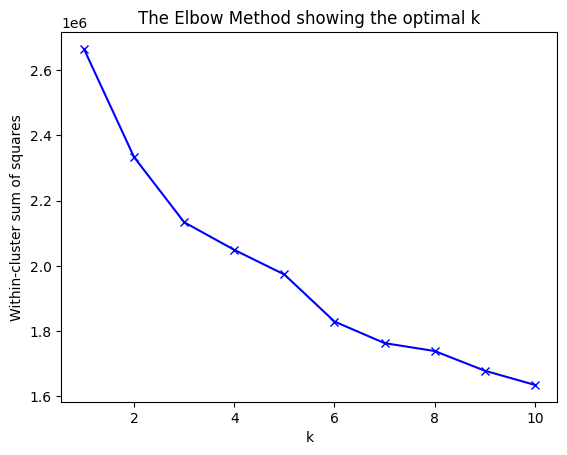

In [44]:
wcss_vec = count_wcss_scores(scaled_df, 10)
x_ticks = list(range(1, len(wcss_vec) + 1))
plt.plot(x_ticks, wcss_vec, 'bx-')
plt.xlabel('k')
plt.ylabel('Within-cluster sum of squares')
plt.title('The Elbow Method showing the optimal k')
plt.show()

3 and 6 seams reasonable

Kmeans for 3 clusters

In [45]:
kmeans = KMeans(3)
kmeans.fit(scaled_df)

KMeans(n_clusters=3)

In [24]:
labels = pd.DataFrame(kmeans.labels_) 
labels

,0
0,1
1,0
2,1
3,2
4,0
...,...
76137,2
76138,2
76139,2
76140,2


In [30]:
labeledData = pd.concat((scaled_df,labels),axis=1)
labeledData = labeledData.rename({0:'labels'},axis=1)
labeledData.head()

,goals,assists,shots_total,shots_on_target,xg,xa,gca,carries,dispossessed,dribbled_past,...,passes_progressive_distance,passes_into_final_third,passes_offsides,passes_switches,dribbles,fouled,fouls,offsides,minutes,labels
0,2.628874,-0.258190,1.633385,-0.478192,3.652755,0.232446,-0.366826,0.034072,0.191555,2.183374,...,-0.376938,0.747199,2.503230,1.306521,-0.700057,1.741734,0.909191,2.035288,0.733626,1
1,-0.302354,-0.258190,-0.712525,-0.478192,-0.453049,0.232446,-0.366826,-0.282095,0.191555,1.224806,...,0.253652,-0.415762,-0.323838,-0.708178,-0.109093,0.062841,0.909191,-0.309168,0.733626,0
2,-0.302354,3.326627,0.069445,-0.478192,0.003151,2.247806,1.812378,-0.124012,0.191555,2.183374,...,-0.736433,-0.415762,2.503230,-0.036611,0.481870,-0.776606,0.909191,-0.309168,0.500572,1
3,-0.302354,-0.258190,0.069445,-0.478192,0.003151,-0.439341,-0.366826,-0.967124,-0.680830,-0.692332,...,-0.642140,-0.028108,2.503230,-0.036611,-0.109093,-0.776606,-0.837129,-0.309168,-1.696796,2
4,-0.302354,3.326627,0.069445,-0.478192,-0.453049,1.576019,1.812378,0.402934,1.063940,6.017649,...,-0.123523,-0.415762,5.330298,-0.708178,1.072834,0.062841,0.909191,-0.309168,0.733626,0


In [6]:
sns.lmplot(x='passes',y='xg',data=labeledData,hue='labels',fit_reg=False)

NameError: name 'labeledData' is not defined

In [4]:
labeledData['Constant'] = "Data"

NameError: name 'labeledData' is not defined

In [5]:
nr_cols = 3
nr_rows = int(np.ceil(len(labeledData.columns) / nr_cols))

plt.figure(figsize=(14, nr_rows * 3))

for i, col in enumerate(labeledData.columns):
    plt.subplot(nr_rows, nr_cols, i+1)
    sns.stripplot(x=labeledData['Constant'],y=labeledData[col],hue=labeledData['labels'],jitter=True)
    plt.title(col)
    plt.tight_layout()

NameError: name 'labeledData' is not defined

Kmeans for 6 clusters

In [40]:
kmeans = KMeans(6)
kmeans.fit(scaled_df)

labels = pd.DataFrame(kmeans.labels_) 

labeledData = pd.concat((scaled_df,labels),axis=1)
labeledData = labeledData.rename({0:'labels'},axis=1)

labeledData['Constant'] = "Data"

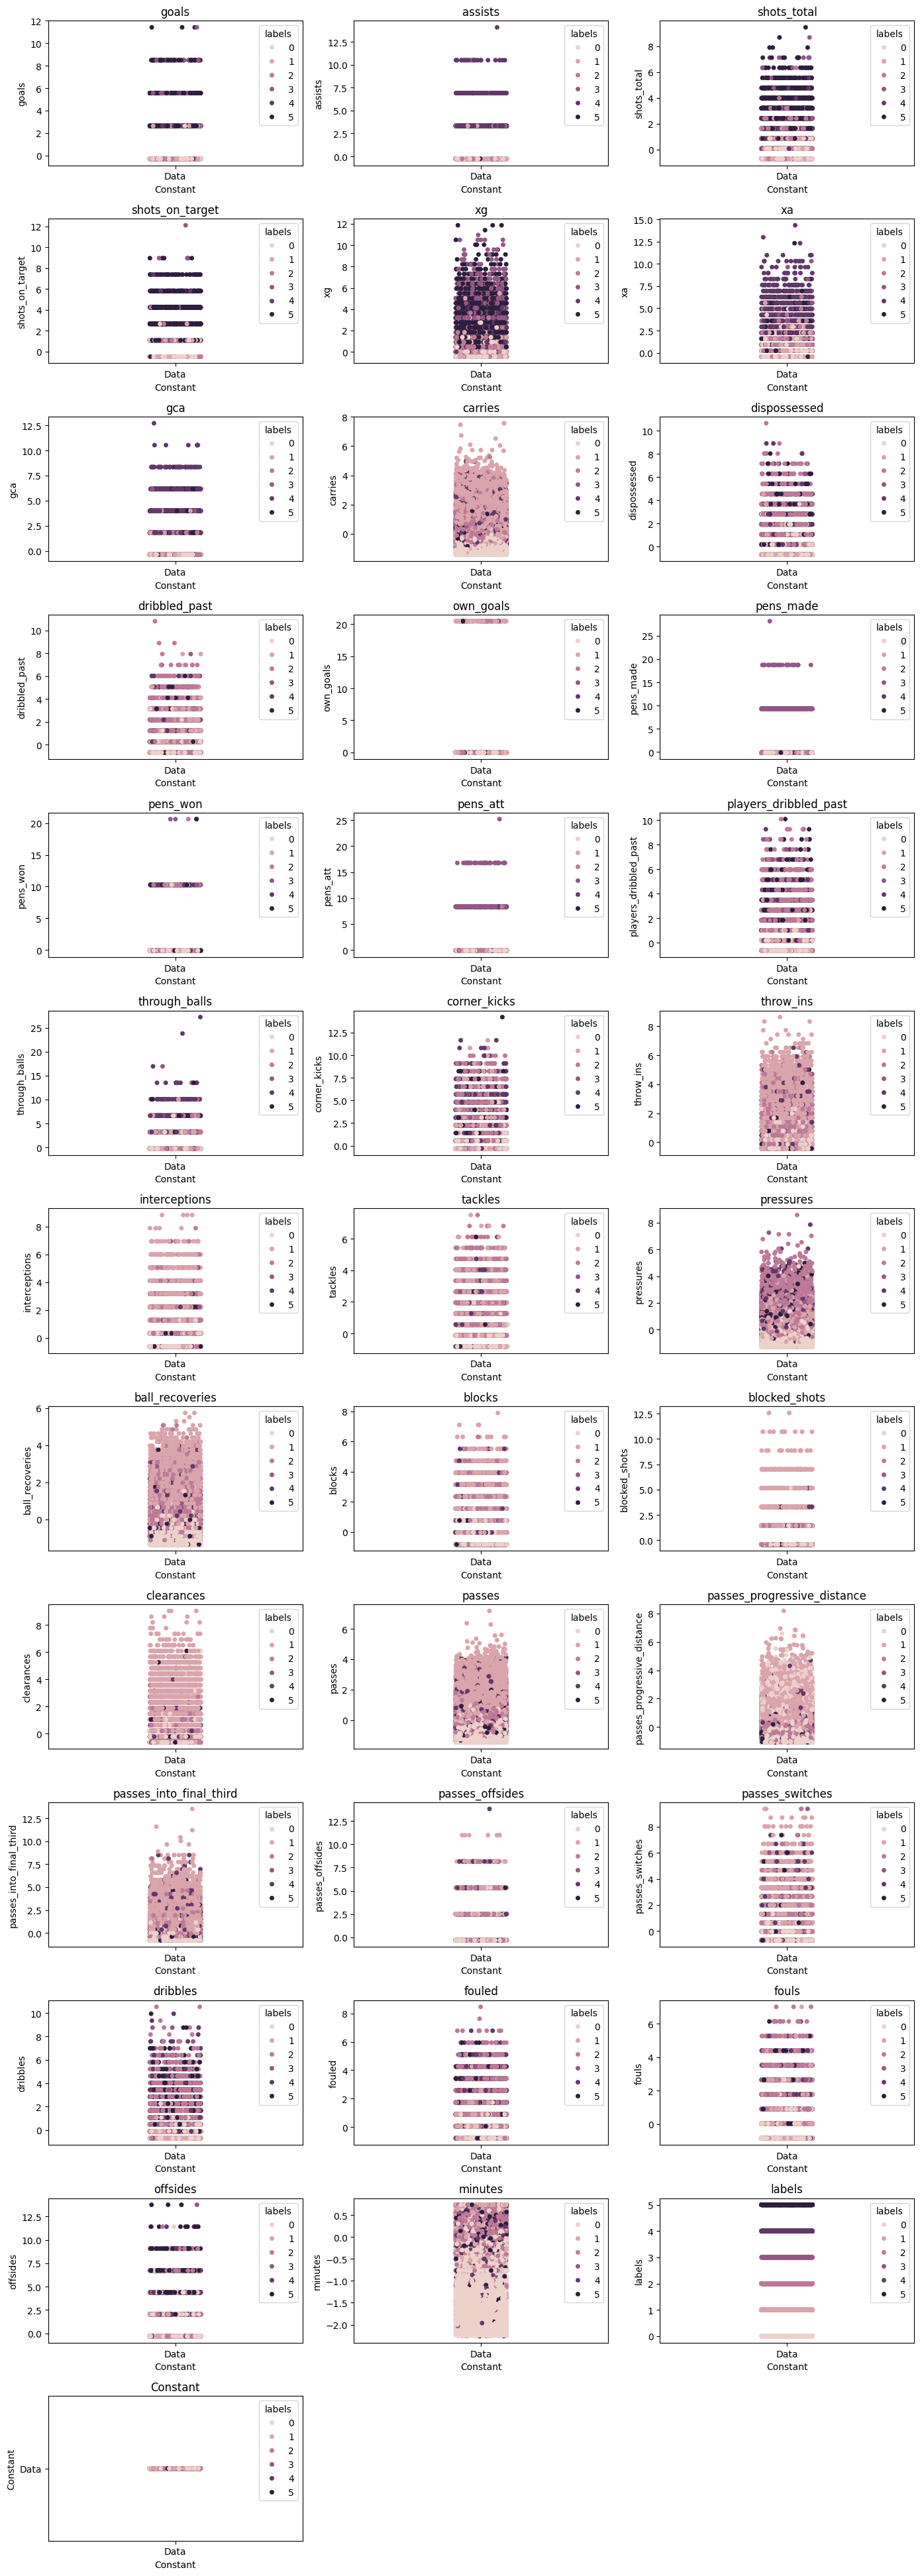

In [41]:
nr_cols = 3
nr_rows = int(np.ceil(len(labeledData.columns) / nr_cols))

plt.figure(figsize=(14, nr_rows * 3))

for i, col in enumerate(labeledData.columns):
    plt.subplot(nr_rows, nr_cols, i+1)
    sns.stripplot(x=labeledData['Constant'],y=labeledData[col],hue=labeledData['labels'],jitter=True)
    plt.title(col)
    plt.tight_layout()

Comparing matrics